In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/stochastic/

Mounted at /content/drive
/content/drive/MyDrive/stochastic


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files = ['AAPL.csv', 'AMZN.csv', 'FB.csv', 'GE.csv', 'GOOGL.csv',
         'GS.csv','IBM.csv', 'JPM.csv', 'MSFT.csv', 'TSLA.csv']
stocks = {}

for file in files:
    stock_name = file.split('.')[0]
    stocks[stock_name] = pd.read_csv(file)

combined_df = pd.concat(stocks.values(), keys=stocks.keys())
combined_df.reset_index(level=0, inplace=True)
combined_df.rename(columns={'level_0': 'Stock'}, inplace=True)


In [ ]:
combined_df

Stock        Date     Open     High      Low  Close(t)     Volume  \
0     AAPL  2005-10-17     6.66     6.69     6.50      6.60  154208600   
1     AAPL  2005-10-18     6.57     6.66     6.44      6.45  152397000   
2     AAPL  2005-10-19     6.43     6.78     6.32      6.78  252170800   
3     AAPL  2005-10-20     6.72     6.97     6.71      6.93  339440500   
4     AAPL  2005-10-21     7.02     7.03     6.83      6.87  199181500   
...    ...         ...      ...      ...      ...       ...        ...   
1210  TSLA  2020-08-07  1499.54  1499.75  1415.01   1452.71    8883500   
1211  TSLA  2020-08-10  1448.00  1457.50  1385.84   1418.57    7522300   
1212  TSLA  2020-08-11  1396.00  1420.00  1365.00   1374.39    8625800   
1213  TSLA  2020-08-12  1470.00  1585.00  1435.00   1554.76   21898800   
1214  TSLA  2020-08-13  1611.00  1651.18  1567.26   1621.00   20425300   

           SD20   Upper_Band   Lower_Band  ...  QQQ_MA10  QQQ_MA20  QQQ_MA50  \
0      0.169237     6.827473     6.150527  ...    33.692   33.9970   34.2690   
1      0.168339     6.819677     6.146323  ...    33.570   33.9525   34.2466   
2      0.180306     6.861112     6.139888  ...    33.562   33.9600   34.2330   
3      0.202674     6.931847     6.121153  ...    33.567   33.9455   34.2190   
4      0.216680     6.974860     6.108140  ...    33.586   33.9365   34.2034   
...         ...          ...          ...  ...       ...       ...       ...   
1210  52.482476  1611.358453  1401.428547  ...   266.054  263.4085  252.2098   
1211  56.031765  1614.532530  1390.405470  ...   267.073  263.9970  252.9570   
1212  62.759540  1620.867580  1369.829420  ...   267.911  264.2380  253.5878   
1213  63.160509  1622.107018  1369.464982  ...   269.120  264.7860  254.3206   
1214  69.101910  1640.007821  1363.600179  ...   270.255  265.4540  255.0446   

      SnP_Close  SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  DJIA(t-5)  \
0       1190.10    1186.57   1187.33    10348.10    10287.34   10238.76   
1       1178.14    1190.10   1184.87    10285.26    10348.10   10253.17   
2       1195.76    1178.14   1177.68    10414.13    10285.26   10216.91   
3       1177.80    1195.76   1176.84    10281.10    10414.13   10216.59   
4       1179.59    1177.80   1186.57    10215.22    10281.10   10287.34   
...         ...        ...       ...         ...         ...        ...   
1210    3351.28    3349.16   3271.12    27433.48    27386.98   26428.32   
1211    3360.47    3351.28   3294.61    27791.44    27433.48   26664.40   
1212    3333.69    3360.47   3306.51    27686.91    27791.44   26828.47   
1213    3380.35    3333.69   3327.77    27976.84    27686.91   27201.52   
1214    3373.43    3380.35   3349.16    27896.72    27976.84   27386.98   

      Close_forcast  
0              6.45  
1              6.78  
2              6.93  
3              6.87  
4              7.01  
...             ...  
1210        1418.57  
1211        1374.39  
1212        1554.76  
1213        1621.00  
1214        1650.71  

[34292 rows x 65 columns]

In [ ]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.set_index('Date', inplace=True)

missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])

combined_df.fillna(method='ffill', inplace=True)


Series([], dtype: int64)


<ipython-input-5-cd7332158e0f>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


In [ ]:
combined_df['Return'] = combined_df.groupby('Stock')['Close(t)'].pct_change()


In [ ]:
mu = combined_df.groupby('Stock')['Return'].mean()  # Expected return
sigma = combined_df.groupby('Stock')['Return'].std()  # Volatility
S0 = combined_df.groupby('Stock')['Close(t)'].last()  # Last closing price
T = 1  # Time horizon (1 year)
N = 252  # Number of trading days
dt = T/N  # Time increment

np.random.seed(42)
simulations = 1000
future_prices = {}

for stock in S0.index:
    S = np.zeros((N, simulations))
    S[0] = S0[stock]

    for t in range(1, N):
        Z = np.random.normal(0, 1, simulations)
        S[t] = S[t-1] * np.exp((mu[stock] - 0.5 * sigma[stock]**2) * dt + sigma[stock] * np.sqrt(dt) * Z)

    future_prices[stock] = S

future_prices_df = {stock: pd.DataFrame(prices) for stock, prices in future_prices.items()}


In [ ]:
future_prices_df

{'AAPL':             0           1           2           3           4           5    \
 0    460.040000  460.040000  460.040000  460.040000  460.040000  460.040000   
 1    460.339728  459.959259  460.430236  460.955345  459.901831  459.901841   
 2    461.181394  460.515469  460.468069  460.569276  460.322240  460.139623   
 3    460.778190  460.430895  459.995258  460.386699  459.190663  460.269520   
 4    459.636998  459.917418  459.749659  461.521831  459.525643  459.471883   
 ..          ...         ...         ...         ...         ...         ...   
 247  475.317193  461.082156  460.805330  467.921851  468.258827  457.614398   
 248  476.737009  461.460863  461.334842  467.646109  467.167783  457.192853   
 249  475.955778  462.180730  461.895286  467.098186  467.270844  457.373345   
 250  475.877047  462.438673  463.245800  466.865103  467.390283  457.552176   
 251  476.222945  463.498002  462.975639  467.670731  466.184645  457.374816   
 
             6           7    

In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close(t)'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_roc(data, window=12):
    return (data['Close(t)'].diff(window) / data['Close(t)'].shift(window)) * 100

combined_df['RSI'] = combined_df.groupby('Stock').apply(calculate_rsi).reset_index(level=0, drop=True)
combined_df['ROC'] = combined_df.groupby('Stock').apply(calculate_roc).reset_index(level=0, drop=True)


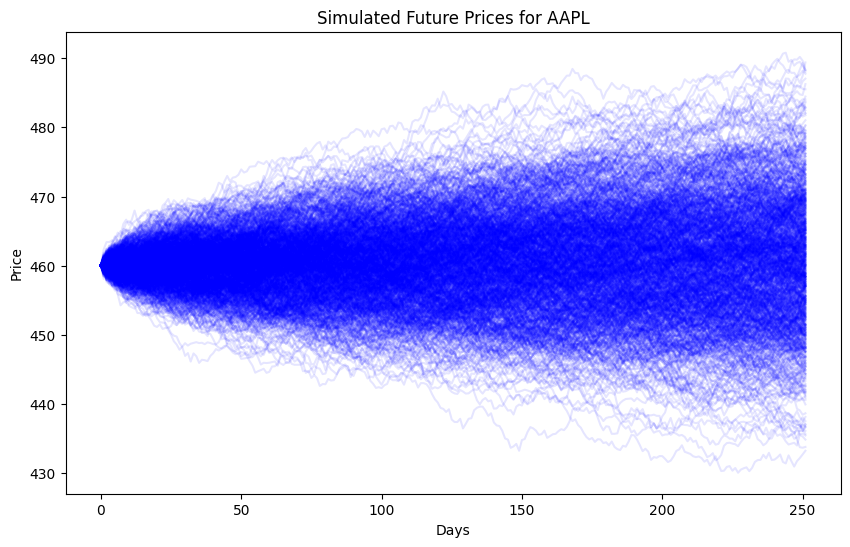

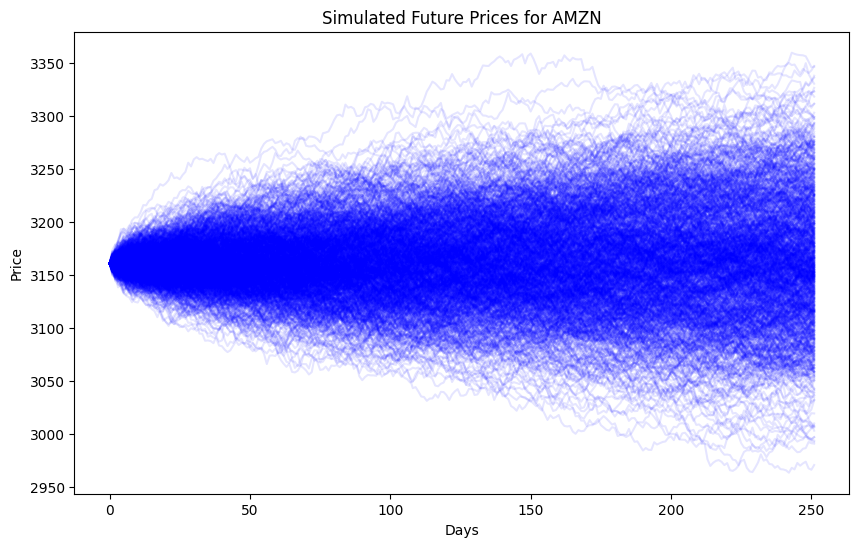

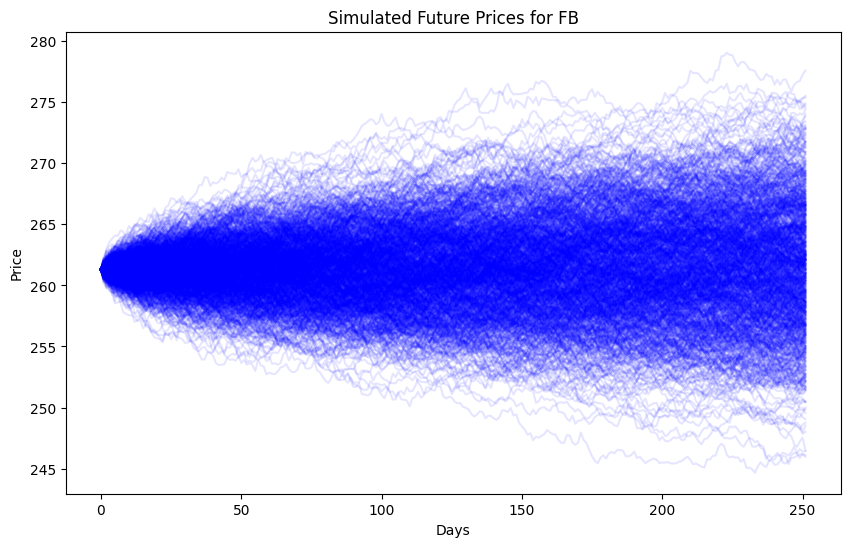

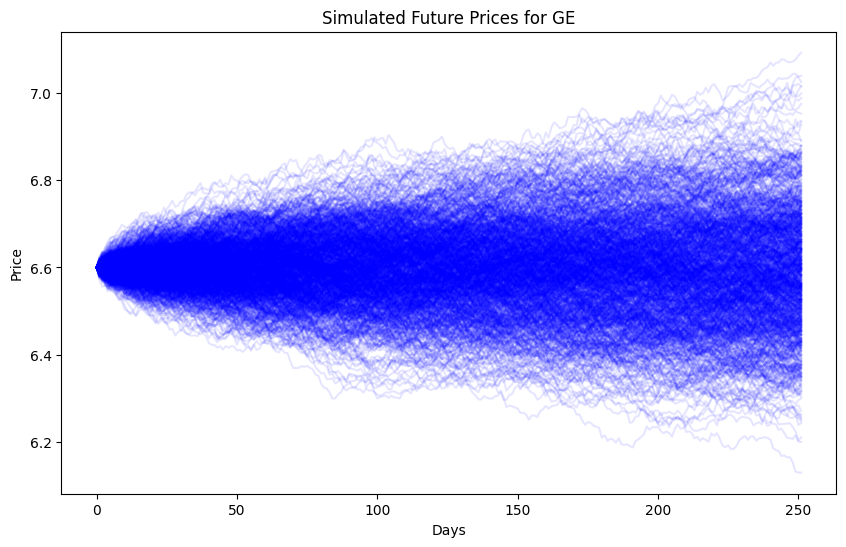

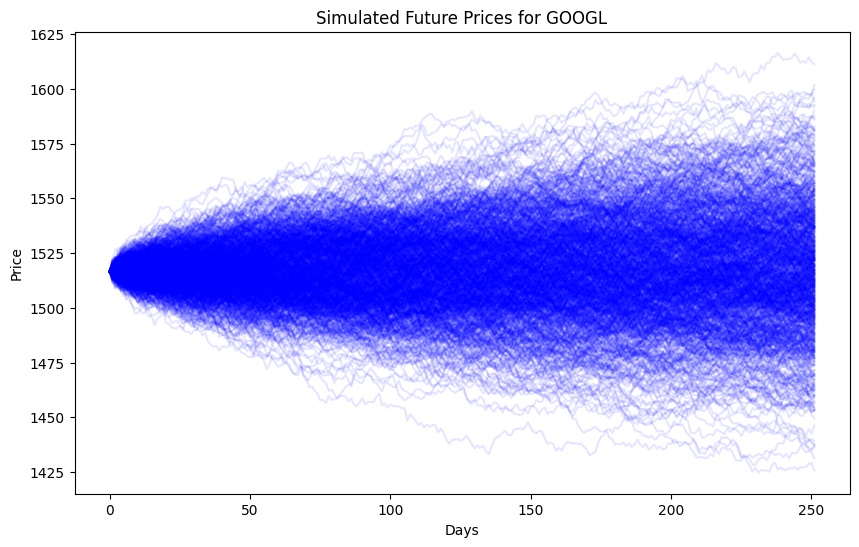

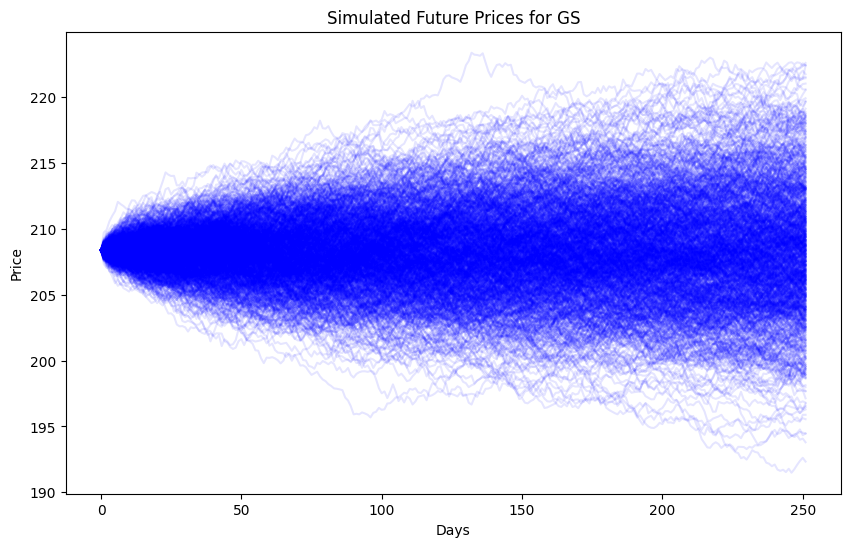

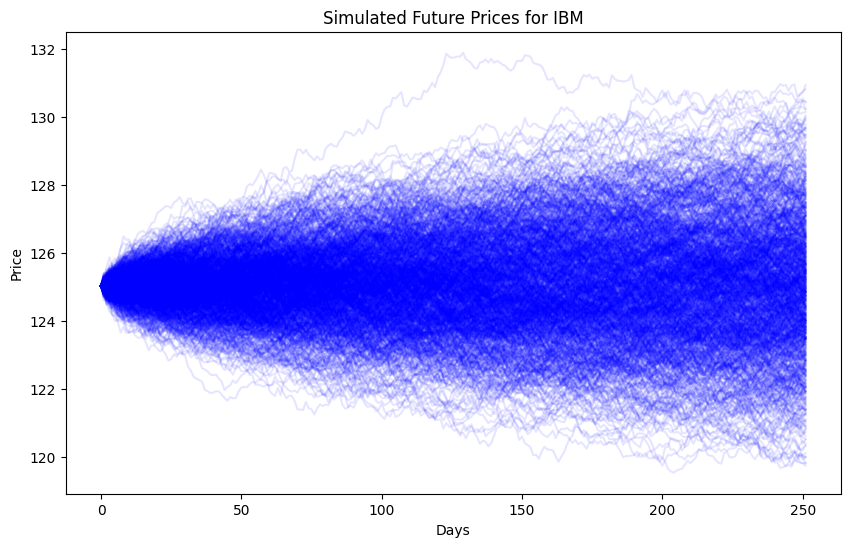

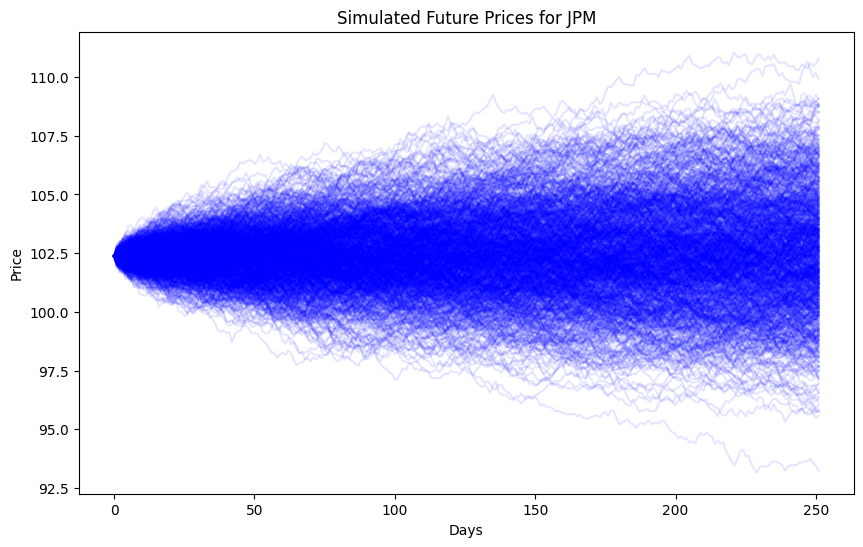

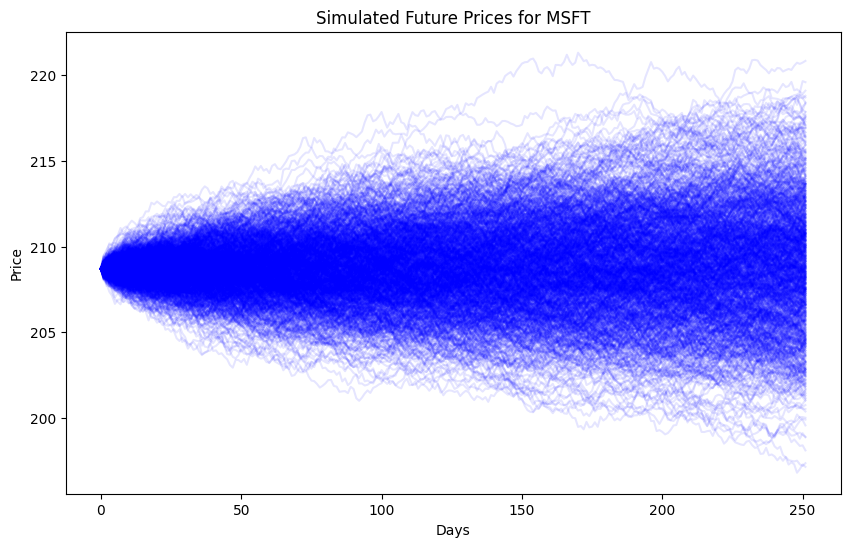

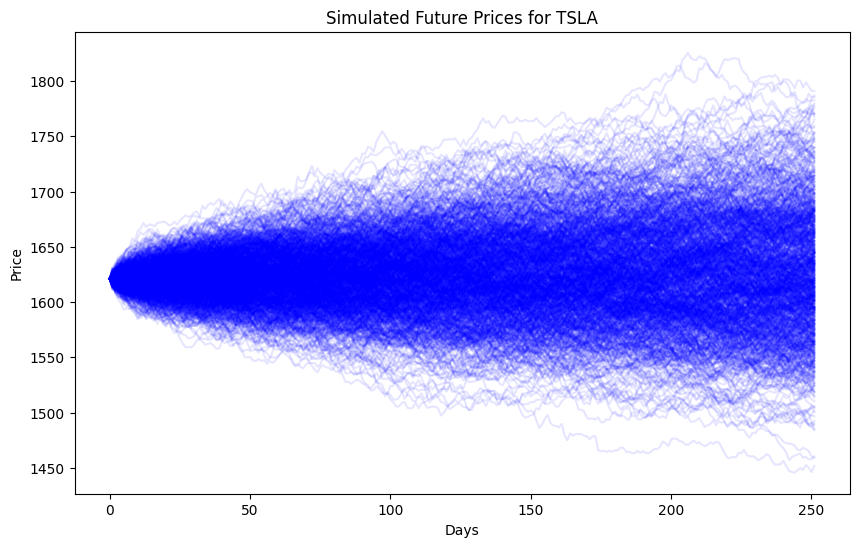

In [ ]:
for stock, prices_df in future_prices_df.items():
    plt.figure(figsize=(10, 6))
    plt.plot(prices_df, color='blue', alpha=0.1)
    plt.title(f'Simulated Future Prices for {stock}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.show()

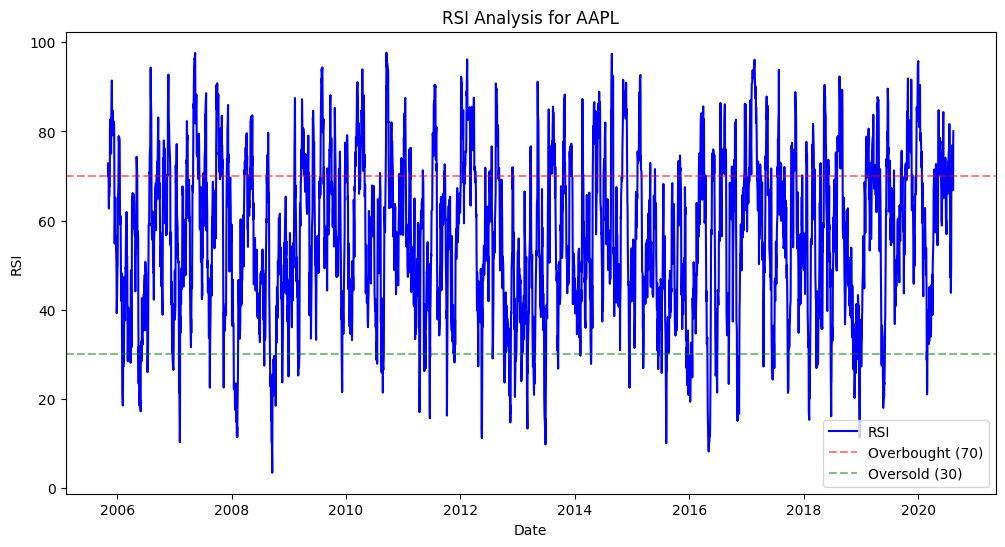

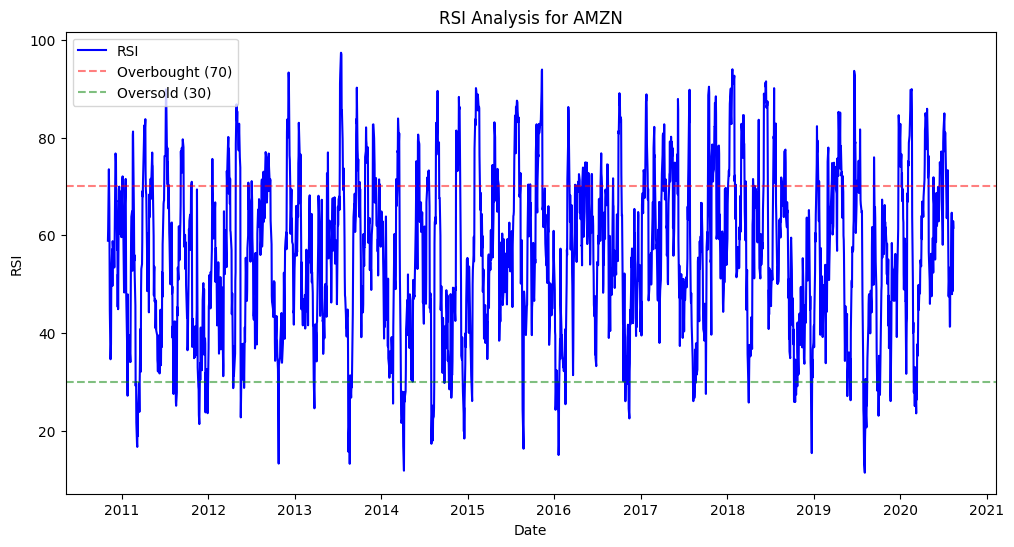

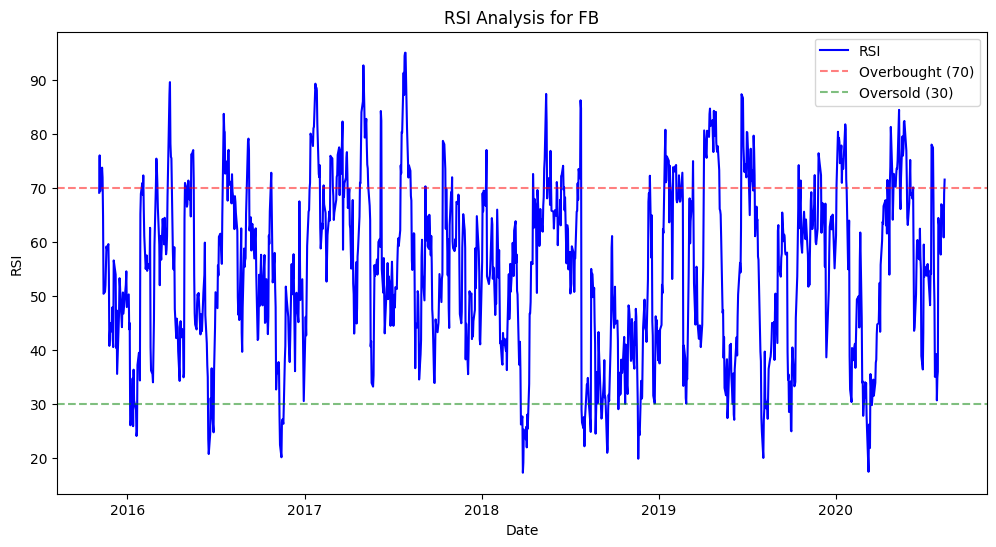

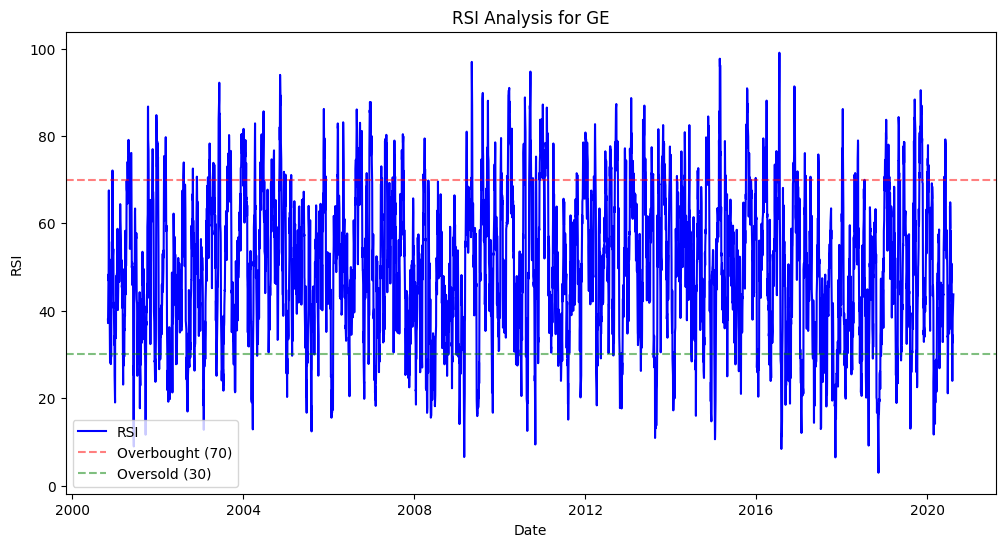

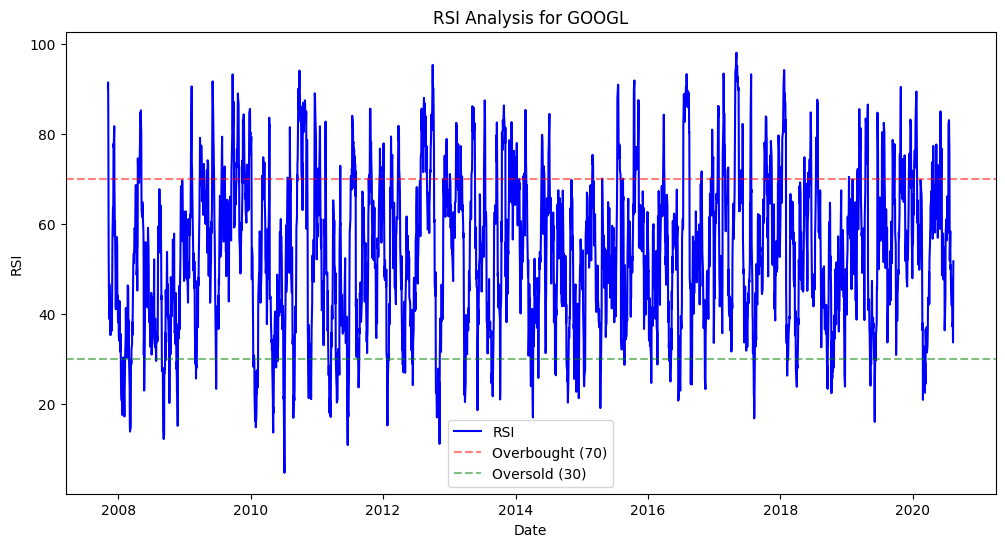

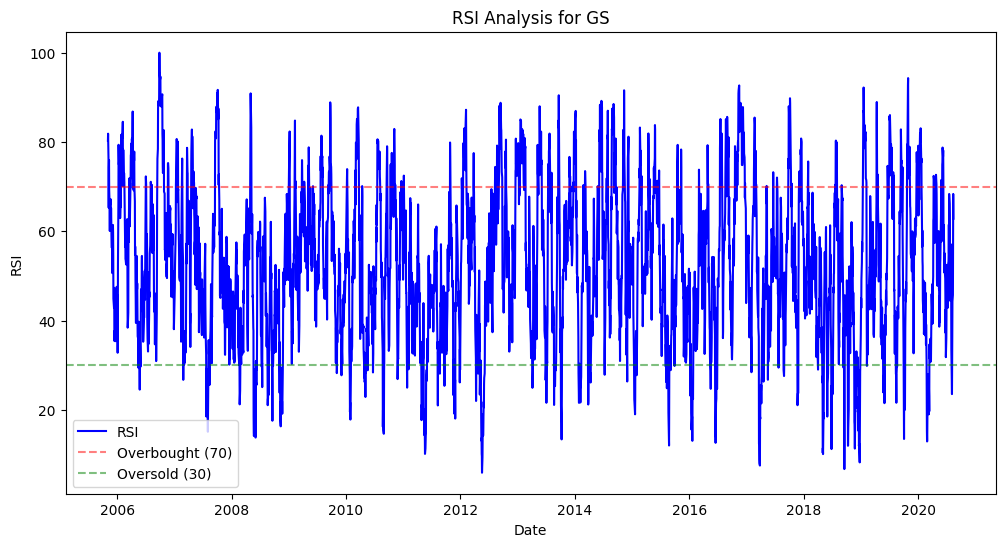

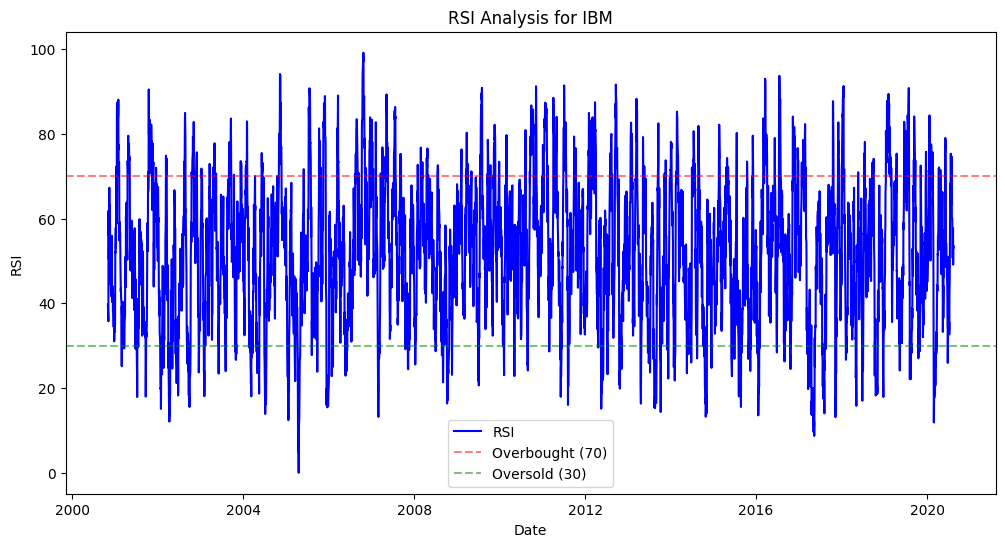

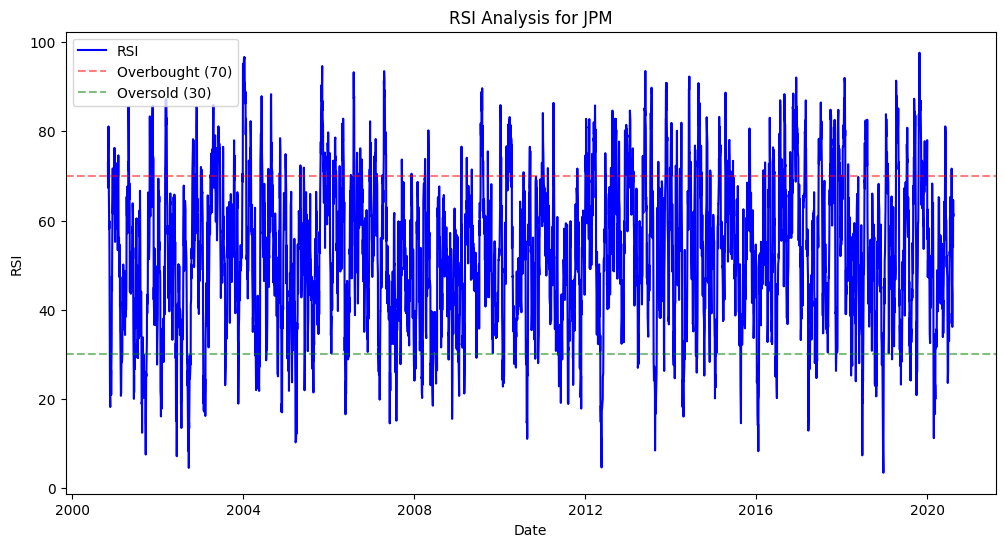

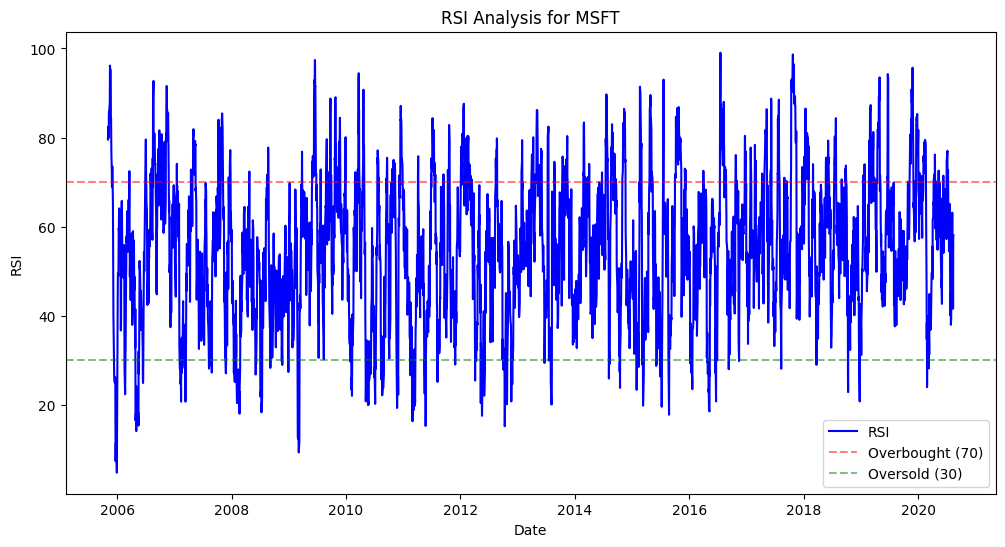

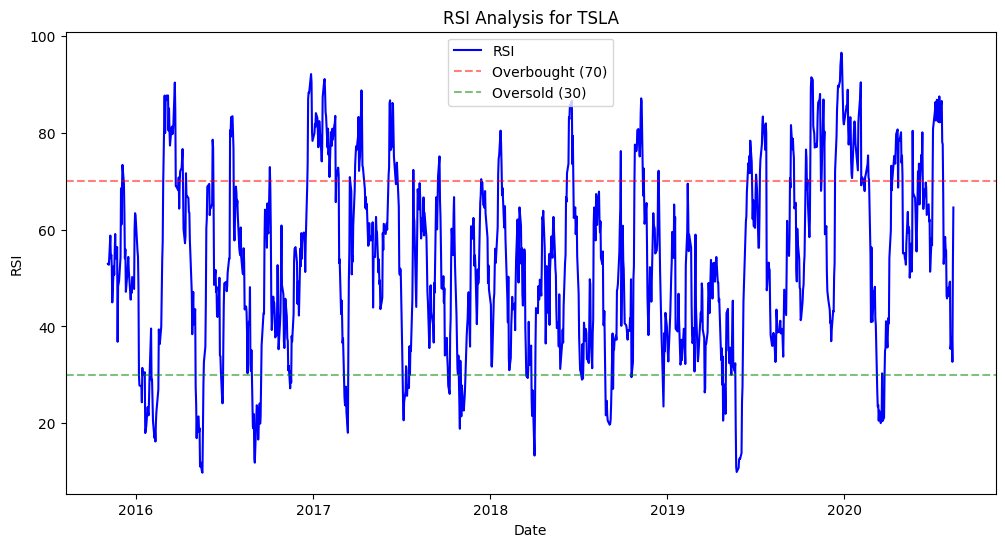

In [ ]:
for stock in combined_df['Stock'].unique():
    stock_data = combined_df[combined_df['Stock'] == stock]
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='blue')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
    plt.title(f'RSI Analysis for {stock}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

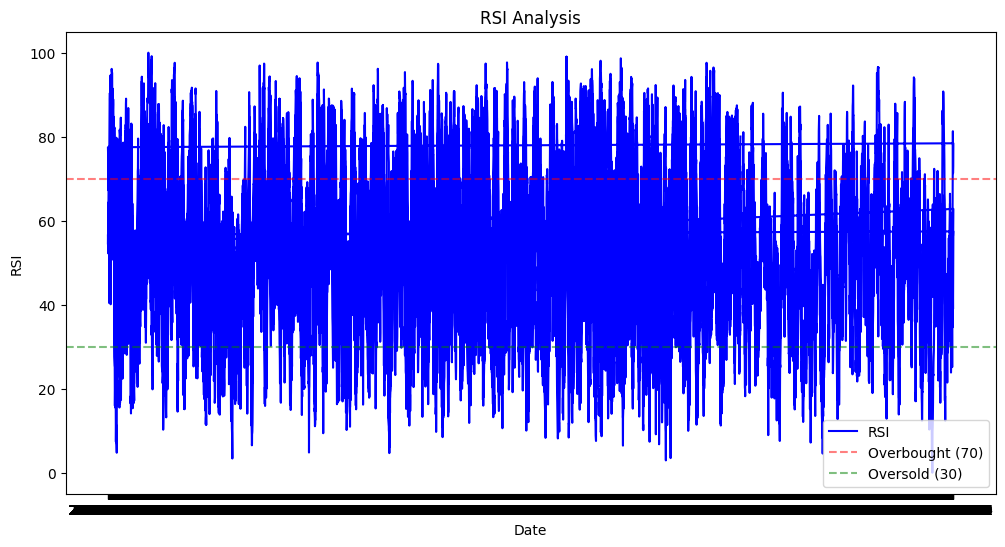

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date_col'], combined_df['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
plt.title('RSI Analysis')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


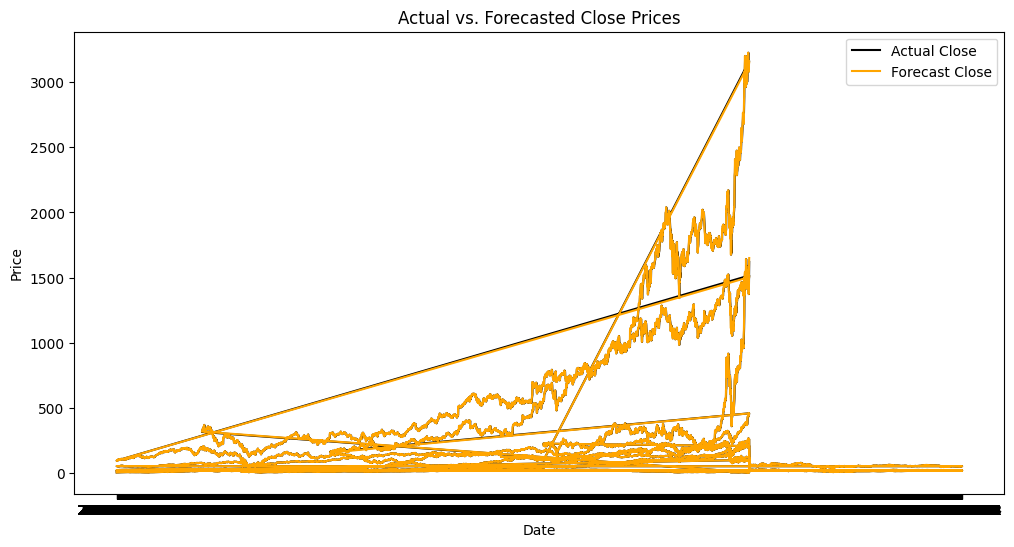

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date_col'], combined_df['Close(t)'], label='Actual Close', color='black')
plt.plot(combined_df['Date_col'], combined_df['Close_forcast'], label='Forecast Close', color='orange')
plt.title('Actual vs. Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
print(combined_df.columns)

Index(['Stock', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast',
       'Return'],
      dtype='object')


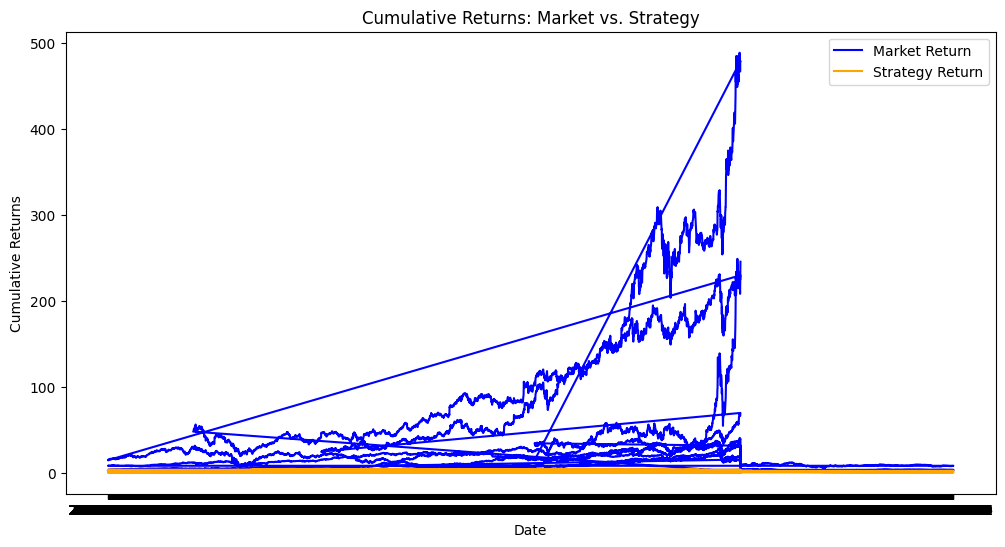

In [ ]:
combined_df['Signal'] = 0
combined_df.loc[combined_df['RSI'] < 30, 'Signal'] = 1  # Buy signal
combined_df.loc[combined_df['RSI'] > 70, 'Signal'] = -1  # Sell signal

combined_df['Market_Return'] = combined_df['Close(t)'].pct_change()
combined_df['Strategy_Return'] = combined_df['Signal'].shift(1) * combined_df['Market_Return']

combined_df['Cumulative_Market_Return'] = (1 + combined_df['Market_Return']).cumprod()
combined_df['Cumulative_Strategy_Return'] = (1 + combined_df['Strategy_Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date_col'], combined_df['Cumulative_Market_Return'], label='Market Return', color='blue')
plt.plot(combined_df['Date_col'], combined_df['Cumulative_Strategy_Return'], label='Strategy Return', color='orange')
plt.title('Cumulative Returns: Market vs. Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


In [ ]:
files = ['AAPL.csv', 'AMZN.csv', 'FB.csv', 'GE.csv', 'GOOGL.csv', 'GS.csv', 'IBM.csv', 'JPM.csv', 'MSFT.csv', 'TSLA.csv']
stocks = {file.split('.')[0]: pd.read_csv(file) for file in files}


In [ ]:
def preprocess_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.fillna(method='ffill', inplace=True)
    return df

for stock_name, df in stocks.items():
    stocks[stock_name] = preprocess_data(df)


<ipython-input-56-0bb9609852ec>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-56-0bb9609852ec>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-56-0bb9609852ec>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-56-0bb9609852ec>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-56-0bb9609852ec>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def prepare_lstm_data(df, time_steps=10):
    data = df['Close(t)'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(scaled_data) - time_steps):
        X.append(scaled_data[i:i + time_steps])
        y.append(scaled_data[i + time_steps])

    return np.array(X), np.array(y), scaler

lstm_data = {}
for stock_name, df in stocks.items():
    X, y, scaler = prepare_lstm_data(df)
    lstm_data[stock_name] = {'X': X, 'y': y, 'scaler': scaler}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_and_train_model(X_train, y_train):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    return model

models = {}
for stock_name, data in lstm_data.items():
    X = data['X']
    y = data['y']
    model = build_and_train_model(X, y)
    models[stock_name] = model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0079
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 7.2470e-04
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 5.7550e-04
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 6.6064e-04
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2605e-04
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.4252e-04
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.8654e-04
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4.5889e-04
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 4.3534e-04
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.4742e-04
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 4.1791e-04
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.3870e-04
Epoch 13/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.8735e-04
Epoch 14/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.

In [ ]:
def make_predictions(model, X, scaler):
    predictions = model.predict(X)
    return scaler.inverse_transform(predictions)

predictions = {}
for stock_name, data in lstm_data.items():
    X = data['X']
    scaler = data['scaler']
    preds = make_predictions(models[stock_name], X, scaler)
    predictions[stock_name] = preds


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


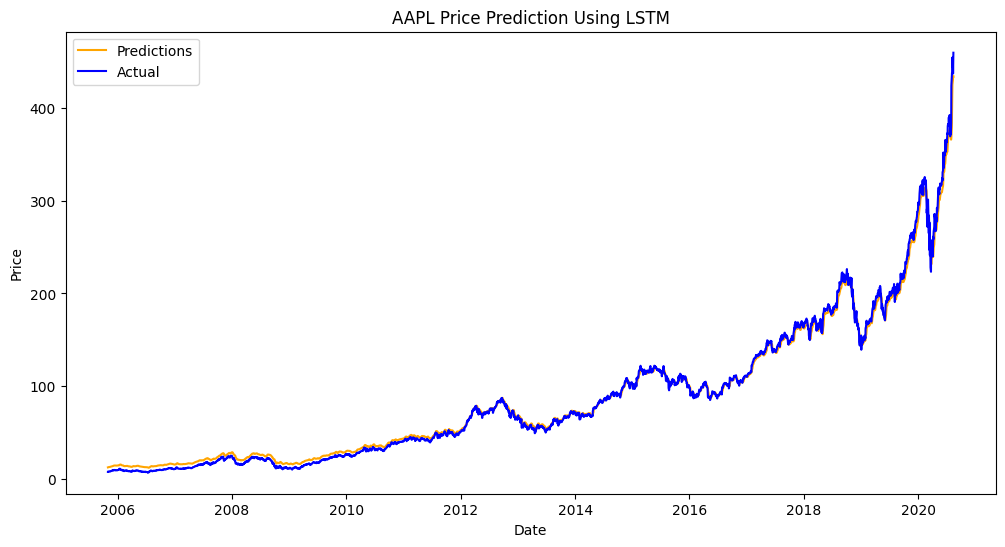

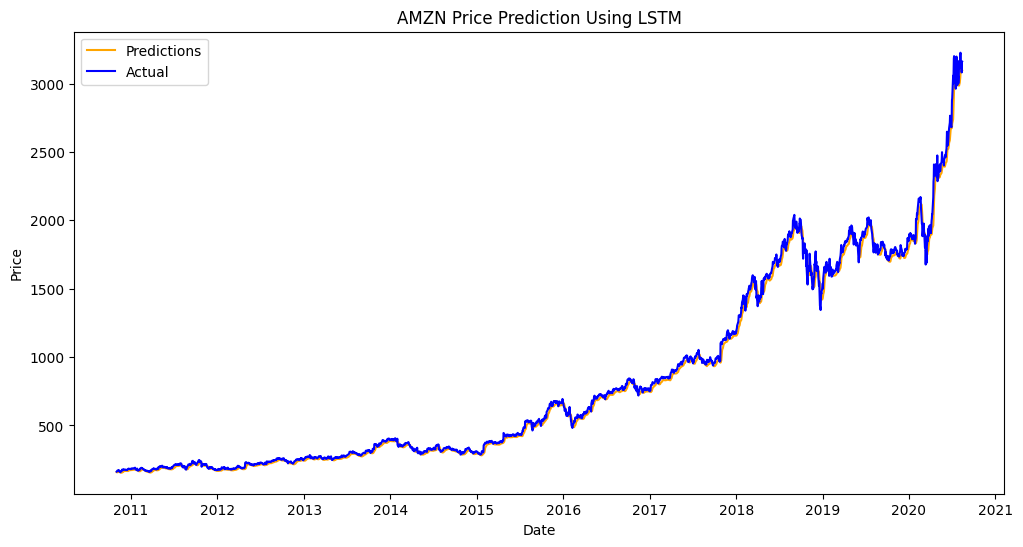

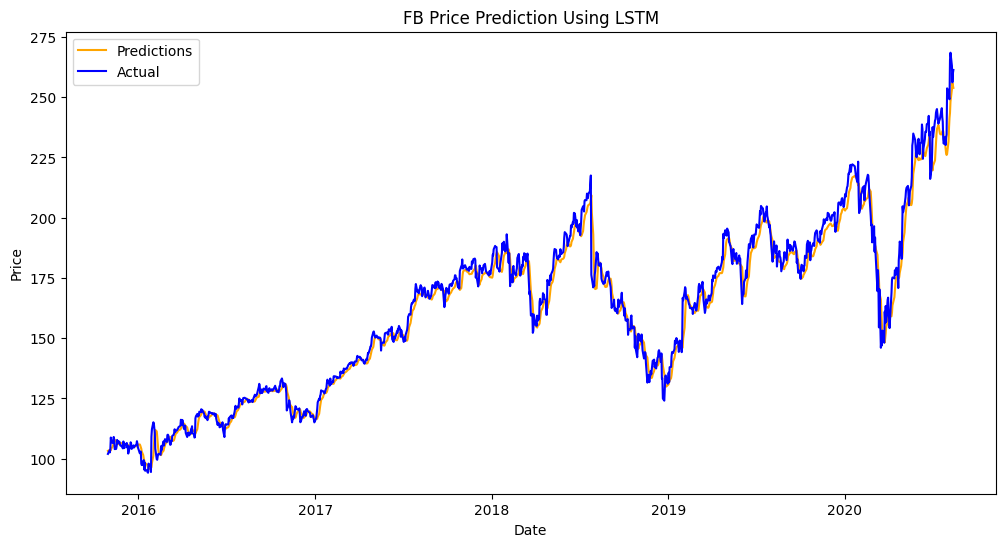

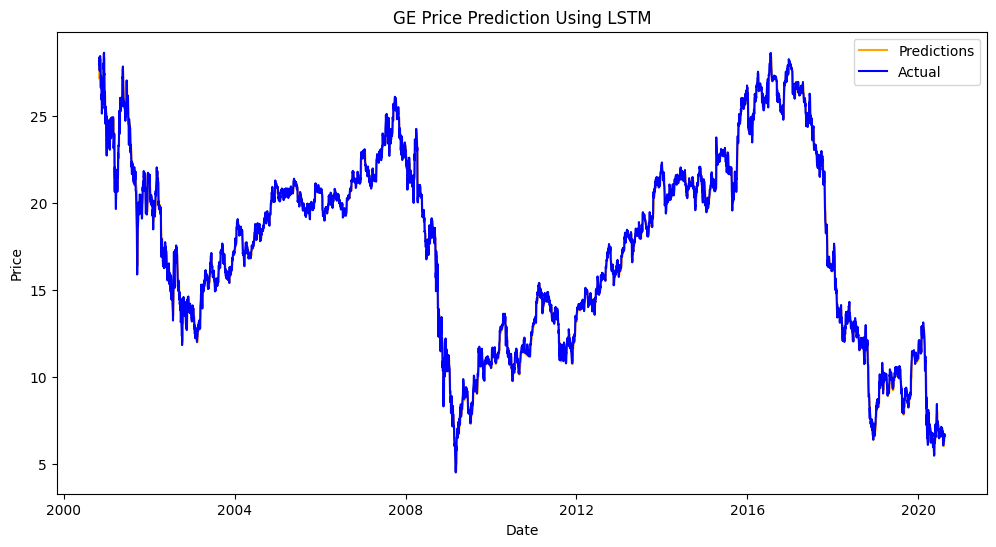

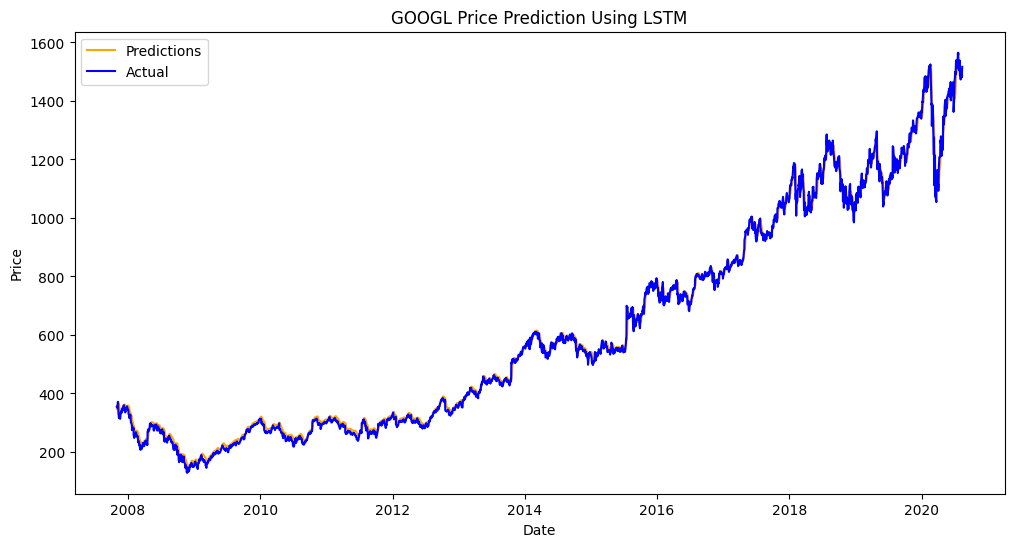

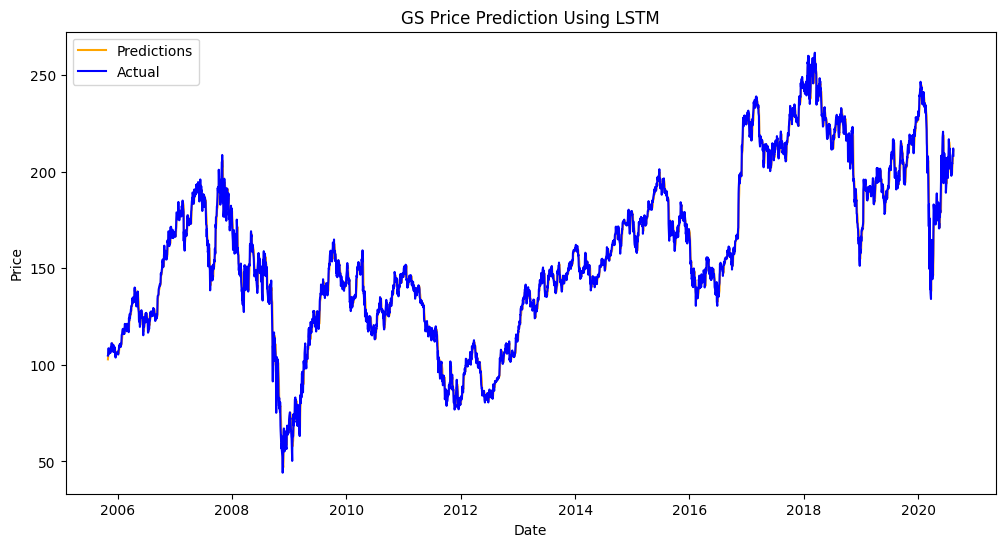

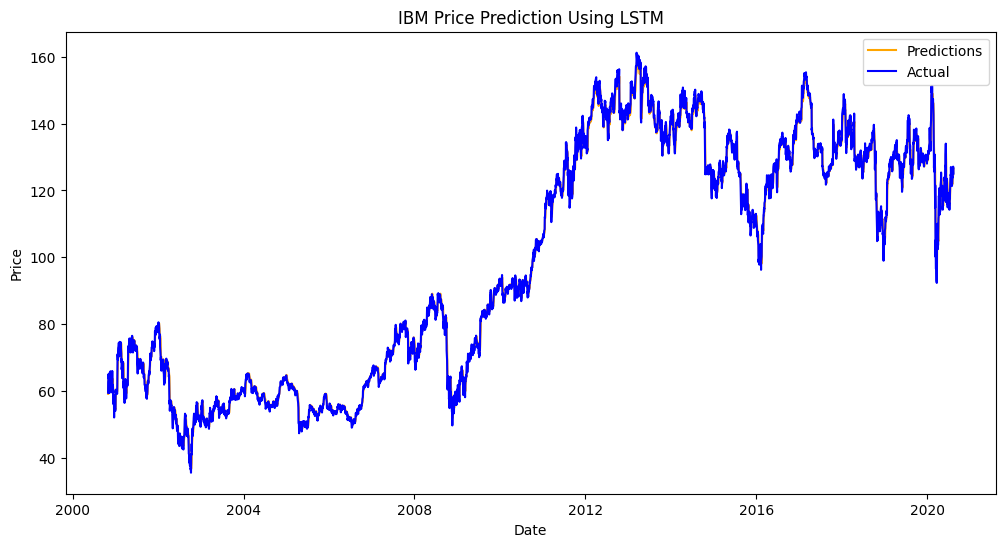

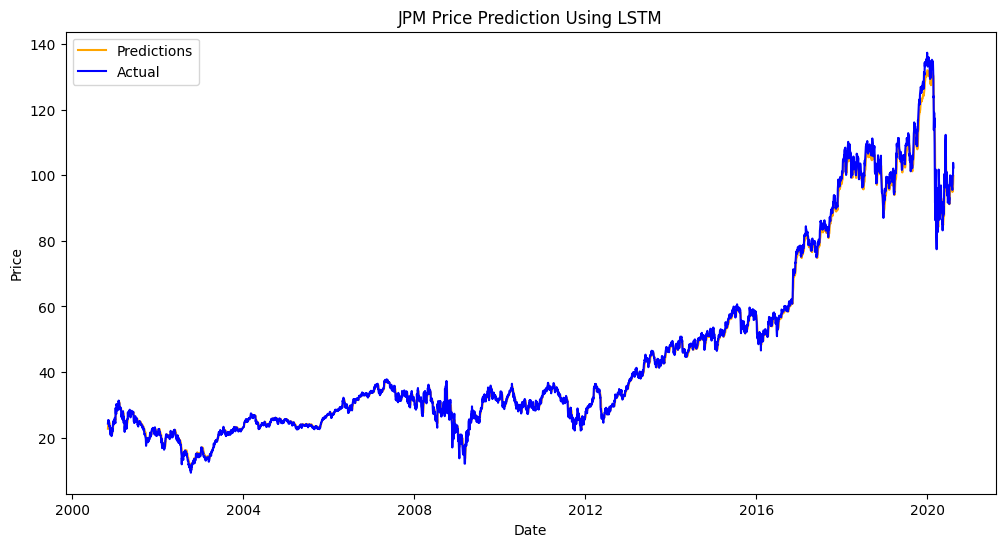

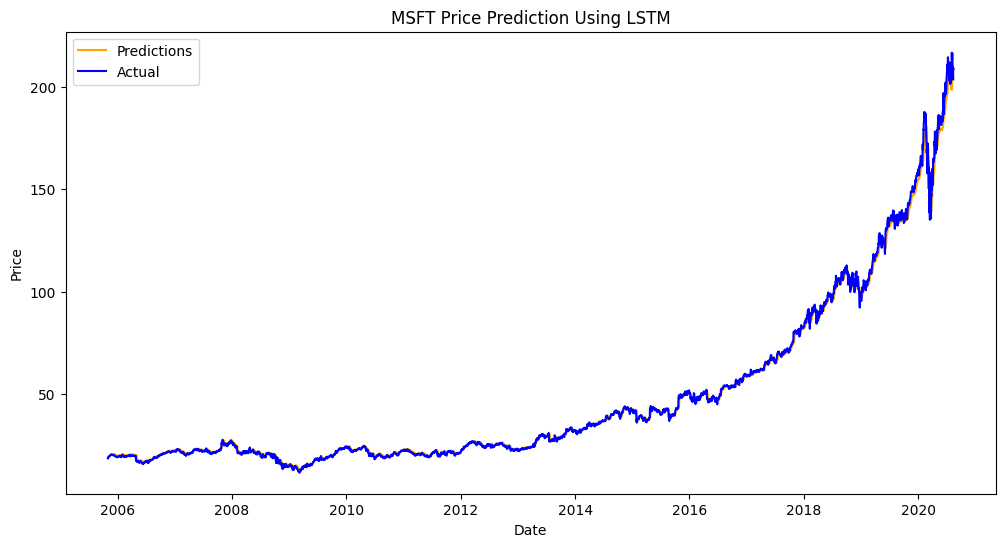

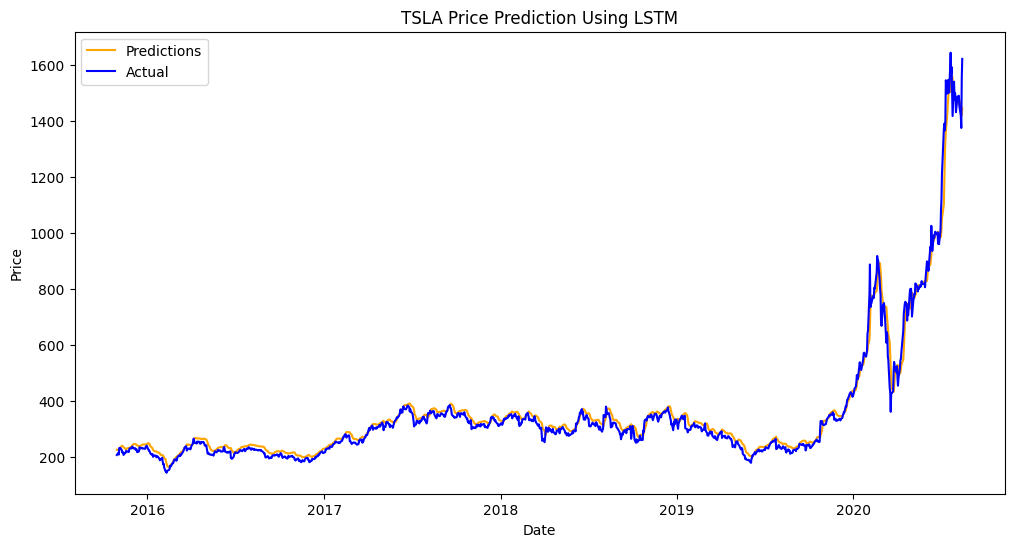

In [ ]:
for stock_name, data in lstm_data.items():
    df = stocks[stock_name]
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-len(predictions[stock_name]):], predictions[stock_name], label='Predictions', color='orange')
    plt.plot(df['Close(t)'].iloc[-len(predictions[stock_name]):].index, df['Close(t)'].iloc[-len(predictions[stock_name]):], label='Actual', color='blue')
    plt.title(f'{stock_name} Price Prediction Using LSTM')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
